In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup
from matplotlib.colors import ListedColormap
from minisom import MiniSom 
import folium
from folium.plugins import MarkerCluster
import leafmap

/tmp/ipykernel_98568/367628529.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For

In [2]:
schema = 'projects_research'
table = 'arroyovivo_residuos_hex'
query = f"SELECT * FROM {schema}.{table}"
residuos = aup.gdf_from_query(query, geometry_col='geometry')

print(residuos.shape)
residuos.head(1)

(562, 51)


,hex_id,res,geometry,aluminio,aluminio_quantity,baterias,baterias_quantity,carton,carton_quantity,cenizas,...,unicel,unicel_quantity,vidrio,vidrio_quantity,epi,epi_quantity,total_points,most_common_point,total_quantity,most_common_quantity
0,8a48a20296a7fff,10,"POLYGON ((-100.30269 25.63956, -100.30201 25.6...",13.0,24.0,0.0,0.0,36.0,44.0,0.0,...,207.0,259.0,89.0,137.0,1.0,1.0,1918.0,Plastico,2669.0,Plastico_quantity


In [3]:
residuos[residuos['tela'] == 15]['tela_quantity'].sum()

197.0

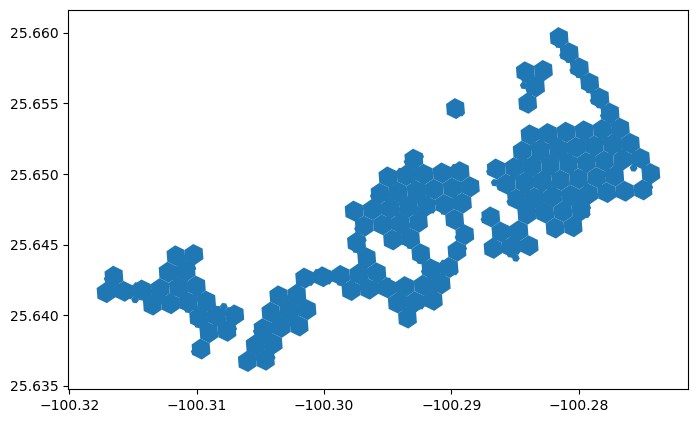

In [4]:
f, axx = plt.subplots(1, figsize=(8, 8))
axx = residuos.plot(axes=axx, alpha=1)
#gdf.xlim(-103.8, -102.8)
#gdf.ylim(20.3, 21)
plt.show()

In [5]:
pd.isna(residuos).sum()

hex_id                      0
res                         0
geometry                    0
aluminio                    0
aluminio_quantity           0
baterias                    0
baterias_quantity           0
carton                      0
carton_quantity             0
cenizas                     0
cenizas_quantity            0
ceramica                    0
ceramica_quantity           0
electronica                 0
electronica_quantity        0
escombros                   0
escombros_quantity          0
goma                        0
goma_quantity               0
llantas                     0
llantas_quantity            0
madera                      0
madera_quantity             0
metal                       0
metal_quantity              0
organico                    0
organico_quantity           0
otros                       0
otros_quantity              0
papel                       0
papel_quantity              0
pesca                       0
pesca_quantity              0
plastico  

In [6]:
residuos['tela'].unique()

array([ 84.,  81., 173.,  15.,  66.,  45., 175.,  39.,  44.,  36.,  52.,
        26.,  40.,  11.,  27.,  16.,   0.,  14.,  43.,  18.,   7.,  19.,
        25.,  23.,   4.,  35.,  30.,   5.,  21.,  29.,  12.,  13.,   9.,
        20.,   8.,   2.,   6.,   1.,   3.,  10.,  38.])

In [7]:
residuos[residuos['tela'] == 2]['hex_id'].count()

52

### Contar hexágonos para el tipo de tela

In [8]:
tela = residuos['tela'].unique()

for i in tela:
    resid_hex = residuos[residuos['tela'] == i]['tela_quantity'].sum() 
    contar_Hex = residuos[residuos['tela'] == i]['hex_id'].count()
    print(f'Tela # {i}: {contar_Hex} hexágono(s) con un total de {resid_hex} residuos de tela.')
    #print(residuos[residuos['tela'] == i]['tela_quantity'])

Tela # 84.0: 1 hexágono(s) con un total de 108.0 residuos de tela.
Tela # 81.0: 1 hexágono(s) con un total de 170.0 residuos de tela.
Tela # 173.0: 1 hexágono(s) con un total de 759.0 residuos de tela.
Tela # 15.0: 3 hexágono(s) con un total de 197.0 residuos de tela.
Tela # 66.0: 1 hexágono(s) con un total de 76.0 residuos de tela.
Tela # 45.0: 1 hexágono(s) con un total de 87.0 residuos de tela.
Tela # 175.0: 1 hexágono(s) con un total de 567.0 residuos de tela.
Tela # 39.0: 1 hexágono(s) con un total de 127.0 residuos de tela.
Tela # 44.0: 1 hexágono(s) con un total de 57.0 residuos de tela.
Tela # 36.0: 1 hexágono(s) con un total de 55.0 residuos de tela.
Tela # 52.0: 3 hexágono(s) con un total de 164.0 residuos de tela.
Tela # 26.0: 1 hexágono(s) con un total de 37.0 residuos de tela.
Tela # 40.0: 1 hexágono(s) con un total de 55.0 residuos de tela.
Tela # 11.0: 3 hexágono(s) con un total de 42.0 residuos de tela.
Tela # 27.0: 2 hexágono(s) con un total de 77.0 residuos de tela.
T

### Mapa Hexágonos distinguidos por los residuos

In [9]:
imp_var_quantity = ['hex_id', 'geometry', 'aluminio_quantity', 'baterias_quantity', 'carton_quantity','cenizas_quantity',
           'ceramica_quantity','electronica_quantity','escombros_quantity','goma_quantity','llantas_quantity',
           'madera_quantity','metal_quantity','organico_quantity','otros_quantity','papel_quantity','pesca_quantity',
           'plastico_quantity','salud e higiene_quantity','tabaco_quantity','tela_quantity','unicel_quantity',
           'vidrio_quantity','epi_quantity']  
residuos_df = residuos.loc[:,imp_var_quantity]
print(residuos_df.shape)
residuos_df.head(2)

(562, 24)


,hex_id,geometry,aluminio_quantity,baterias_quantity,carton_quantity,cenizas_quantity,ceramica_quantity,electronica_quantity,escombros_quantity,goma_quantity,...,otros_quantity,papel_quantity,pesca_quantity,plastico_quantity,salud e higiene_quantity,tabaco_quantity,tela_quantity,unicel_quantity,vidrio_quantity,epi_quantity
0,8a48a20296a7fff,"POLYGON ((-100.30269 25.63956, -100.30201 25.6...",24.0,0.0,44.0,0.0,52.0,2.0,39.0,0.0,...,2.0,140.0,0.0,1479.0,37.0,21.0,108.0,259.0,137.0,1.0
1,8a48a202978ffff,"POLYGON ((-100.30331 25.63839, -100.30263 25.6...",33.0,0.0,15.0,2.0,5.0,5.0,59.0,2.0,...,6.0,119.0,0.0,1640.0,38.0,7.0,170.0,238.0,55.0,0.0


#### La mayor cantidad de residuos por Hexágono

In [10]:
imp_var = ['aluminio', 'baterias', 'carton','cenizas','ceramica','electronica','escombros','goma',
           'llantas','madera','metal','organico','otros','papel','pesca','plastico','salud e higiene',
           'tabaco','tela','unicel','vidrio','epi'] 

lista_hex = residuos_df['hex_id'].tolist()
lista_maximo = []
lista_material = []
cantidad_filas = residuos_df.shape[0]

for i in range(cantidad_filas):
    hex_id = lista_hex[i]
    fila_seleccionada = residuos_df.iloc[i, 2:]
    maximo = max(fila_seleccionada)
    
    # Encontrar todos los índices del valor máximo
    indices_maximo = [j for j, valor in enumerate(fila_seleccionada) if valor == maximo]
    
    # Obtener los materiales correspondientes a los índices máximos
    materiales_maximos = [imp_var[indice] for indice in indices_maximo]
    
    lista_maximo.append(maximo)
    lista_material.append(materiales_maximos)
    
    #print(f'Máximo del hexágono {hex_id}({i}): {maximo} del material(es) {materiales_maximos}')


In [11]:
colimportantes = ['hex_id', 'geometry']
data_maximo = residuos_df[colimportantes].copy()
data_maximo['Cantidad'] = lista_maximo
data_maximo['Material(es)'] = lista_material
print(data_maximo.crs)
data_maximo.head(4)

epsg:4326


,hex_id,geometry,Cantidad,Material(es)
0,8a48a20296a7fff,"POLYGON ((-100.30269 25.63956, -100.30201 25.6...",1479.0,[plastico]
1,8a48a202978ffff,"POLYGON ((-100.30331 25.63839, -100.30263 25.6...",1640.0,[plastico]
2,8a48a202baaffff,"POLYGON ((-100.29357 25.64128, -100.29289 25.6...",1787.0,[plastico]
3,8a48a202ba1ffff,"POLYGON ((-100.29499 25.64119, -100.29431 25.6...",1200.0,[plastico]


In [12]:
data_maximo.tail()

,hex_id,geometry,Cantidad,Material(es)
557,8b48a202b71bfff,"POLYGON ((-100.28106 25.64755, -100.28087 25.6...",1.0,[plastico]
558,8b48a202b616fff,"POLYGON ((-100.27945 25.64910, -100.27927 25.6...",1.0,[plastico]
559,8b48a202ba6efff,"POLYGON ((-100.29955 25.64217, -100.29936 25.6...",1.0,[tela]
560,8b48a202b675fff,"POLYGON ((-100.28401 25.65008, -100.28383 25.6...",1.0,[tabaco]
561,8b48a202b68afff,"POLYGON ((-100.27816 25.65191, -100.27797 25.6...",1.0,[otros]


In [14]:
data_maximo['Cantidad'].unique()

array([1.479e+03, 1.640e+03, 1.787e+03, 1.200e+03, 1.363e+03, 1.167e+03,
       1.251e+03, 4.420e+02, 7.220e+02, 3.810e+02, 9.970e+02, 4.070e+02,
       3.480e+02, 3.160e+02, 2.600e+02, 6.360e+02, 6.900e+02, 1.970e+02,
       2.920e+02, 2.390e+02, 1.780e+02, 3.350e+02, 4.500e+02, 6.640e+02,
       2.610e+02, 4.930e+02, 1.770e+02, 2.690e+02, 2.060e+02, 4.410e+02,
       1.540e+02, 1.520e+02, 1.800e+02, 2.050e+02, 4.170e+02, 1.820e+02,
       1.450e+02, 5.960e+02, 1.680e+02, 3.220e+02, 1.850e+02, 3.910e+02,
       2.080e+02, 8.900e+01, 2.520e+02, 1.960e+02, 3.780e+02, 4.050e+02,
       1.160e+02, 9.300e+01, 1.170e+02, 1.150e+02, 2.000e+02, 2.720e+02,
       1.100e+02, 1.390e+02, 9.700e+01, 1.260e+02, 3.360e+02, 3.560e+02,
       8.600e+01, 2.090e+02, 2.200e+02, 8.400e+01, 2.100e+02, 1.530e+02,
       4.100e+01, 9.000e+01, 1.370e+02, 3.860e+02, 1.090e+02, 1.330e+02,
       1.640e+02, 7.800e+01, 7.600e+01, 7.000e+01, 1.220e+02, 2.010e+02,
       1.010e+02, 2.230e+02, 8.500e+01, 4.700e+01, 

In [15]:
unique_materials = data_maximo['Material(es)'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x).unique()
len(unique_materials)

34

# Mapa Interactivo

In [31]:
import folium
from folium import GeoJson
import matplotlib.cm as cm
from matplotlib.colors import to_hex

# Convert lists to strings in 'Material(es)'
data_maximo['Material(es)'] = data_maximo['Material(es)'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Unique values of 'Material(es)'
unique_materials = data_maximo['Material(es)'].unique()

# Create a colormap with a color for each unique value
color_map = cm.get_cmap('tab20', len(unique_materials))

# Create a color mapping dictionary
color_mapping = {material: to_hex(color_map(i)) for i, material in enumerate(unique_materials)}

# Create a function to get the color based on the 'Material(es)' value
def get_color(feature):
    material_value = feature['properties']['Material(es)']
    return color_mapping.get(material_value, 'gray')

# Create a map centered at the mean coordinates
m = folium.Map(location=[data_maximo['geometry'].centroid.y.mean(), data_maximo['geometry'].centroid.x.mean()], zoom_start=14.45)

# Add GeoJson layer with styling based on 'Material(es)'
geojson_layer = GeoJson(data_maximo,
                        style_function=lambda feature: {
                            'fillColor': get_color(feature),
                            'color': 'black',
                            'weight': 1,
                            'fillOpacity': 0.6,
                        },
                        highlight_function=lambda x: {'weight': 3, 'color': 'black'},
                        tooltip=folium.GeoJsonTooltip(fields=['Cantidad', 'Material(es)'], labels=True, sticky=True)
                       ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

#Save the map
m.save("Arroyo_Vivo_MaterialesMax.html")

# Show the map
m


### La menor cantidad de residuos por hexágono

In [39]:
#imp_var = ['aluminio', 'baterias', 'carton','cenizas','ceramica','electronica','escombros','goma',
#           'llantas','madera','metal','organico','otros','papel','pesca','plastico','salud e higiene',
#           'tabaco','tela','unicel','vidrio','epi'] 

list_hex = residuos_df['hex_id'].tolist()
list_minimo = []
list_material = []
cant_filas = residuos_df.shape[0]

for i in range(cant_filas):
    hex_id = list_hex[i]
    fila_seleccionada = residuos_df.iloc[i, 2:]
    minimo = min(fila_seleccionada)
    
    # Encontrar todos los índices del valor máximo
    indices_minimo = [j for j, valor in enumerate(fila_seleccionada) if valor == minimo]
    
    # Obtener los materiales correspondientes a los índices máximos
    materiales_minimos = [imp_var[indice] for indice in indices_minimo]
    
    list_minimo.append(minimo)
    list_material.append(materiales_minimos)
    
    #print(f'Mínimo del hexágono {hex_id}({i}): {minimo} del material(es) {materiales_minimos}')


In [40]:
columnasimportantes = ['hex_id', 'geometry']
data_minimo = residuos_df[columnasimportantes].copy()
data_minimo['Cantidad'] = list_minimo
data_minimo['Material(es)'] = list_material
print(data_minimo.crs)
data_minimo.head(4)

epsg:4326


,hex_id,geometry,Cantidad,Material(es)
0,8a48a20296a7fff,"POLYGON ((-100.30269 25.63956, -100.30201 25.6...",0.0,"[baterias, cenizas, goma, pesca]"
1,8a48a202978ffff,"POLYGON ((-100.30331 25.63839, -100.30263 25.6...",0.0,"[baterias, pesca, epi]"
2,8a48a202baaffff,"POLYGON ((-100.29357 25.64128, -100.29289 25.6...",0.0,"[aluminio, baterias, cenizas, ceramica, electr..."
3,8a48a202ba1ffff,"POLYGON ((-100.29499 25.64119, -100.29431 25.6...",0.0,"[baterias, cenizas, electronica, llantas, pesc..."


In [41]:
data_minimo['Cantidad'].unique()

array([0.])